# Sustainable energy companies and its comparison to standard ones

##  Data analysis and visualisation part
In this module, user insterts the timeframe that he want to observe and also can create two portfolios, that will be analyzed and compared, the portfolios will be created by specifing codes of stocks and than downloaded from yahoo finance

In [91]:
#popisná statistika - datasetů, vizualizace, vytvoření portfolia + analýza
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
import yfinance as yf
import seaborn as sns
import functools as reduce

## Loading the Data 

- to see detatiled info on data that we use, see documentation
- We will take some of the biggest renewable Energy Companies in the World and create on portfolio from them
- And we will also take some of the largest energy companies that do not focus maily on sustainable resouces
- more details: frequency: daily, historical prices, time period: last 5Y

In [92]:
# myslím, že to máš upravit dle poznámek z hovoru (něco s dokumetací té funkce)
# Function to extract stock data we want
def get_stock_data(tickers, num_days_back, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days = num_days_back)
    
    # Initialize a dataframe to store stock data
    df = pd.DataFrame()
    
    # For each stock, download the desired information
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end = end_date)
        df[ticker] = data[info_type]
    
    return df

In [93]:
# Stocks/Tickers we want to analyze
first_dataset= ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]
# Get Adjusted Close prices
sustainable = get_stock_data(tickers = first_dataset, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def analyze_dataset(df, summary_stat=False, data_quality=False, exploratory_analysis=False):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The provided input is not appropriate DataFrame.")

    # Summary Statistics
    if summary_stat: 
        print("Shape of the DataFrame:", df.shape)
        print("First 5 rows of the DataFrame:")
        print(df.head(5))
        print("DataFrame Info:")
        print(df.info())
        print("Descriptive Statistics:")
        print(df.describe())

    # Data Quality Check
    if data_quality:
        print("Number of missing values in each column:")
        print(df.isna().sum())
        print("Duplicate rows in the DataFrame:")
        print(df[df.duplicated()])

    # Exploratory Analysis
    if exploratory_analysis:
        # Graph of Stocks
        plt.figure(figsize=(15, 6))
        for column in df.columns:
            plt.plot(df.index, df[column], label=column)
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.title('Selected Stocks Values Over Time')
        plt.legend()
        plt.show()

        # Each Stock Alone
        nrows = 2
        ncols = 5
        fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))
        axes = axes.flatten()
        for i, column in enumerate(df.columns):
            axes[i].plot(df.index, df[column])
            axes[i].set_title(column, fontsize=10)
            axes[i].set_xlabel('Date', fontsize=8)
            axes[i].set_ylabel('Value', fontsize=8)
            axes[i].tick_params(axis='x', labelrotation=45)
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        plt.tight_layout(pad=3.0)
        plt.show()

        # Box Plot Distribution Analysis
        ax = df.plot(kind='box')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.tick_params(axis='x', labelsize=8)
        plt.show()

        # Heatmap for Correlation Between Stocks
        correlation_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True)
        plt.tight_layout()
        plt.show()


Shape of the DataFrame: (689, 10)
First 5 rows of the DataFrame:
                  AQN       BEPC  CEG       CSIQ         DQ         GE  \
Date                                                                     
2021-04-30  13.721618  37.357765  NaN  41.240002  80.489998  81.143181   
2021-05-03  13.687613  37.087574  NaN  41.330002  79.540001  83.184128   
2021-05-04  13.568589  36.394096  NaN  39.200001  74.510002  81.143181   
2021-05-05  13.390057  36.249992  NaN  39.009998  77.199997  81.699791   
2021-05-06  13.390057  35.781673  NaN  39.200001  73.589996  81.699791   

                IBDRY        JKS        NEE      VWDRY  
Date                                                    
2021-04-30  47.682777  35.363224  72.762421  13.655316  
2021-05-03  48.428368  35.296249  72.002014  13.391793  
2021-05-04  47.437168  32.684193  71.053894  12.525359  
2021-05-05  48.016102  32.071842  69.260872  13.391793  
2021-05-06  48.279247  30.607944  69.476791  12.609207  
DataFrame Info:
<

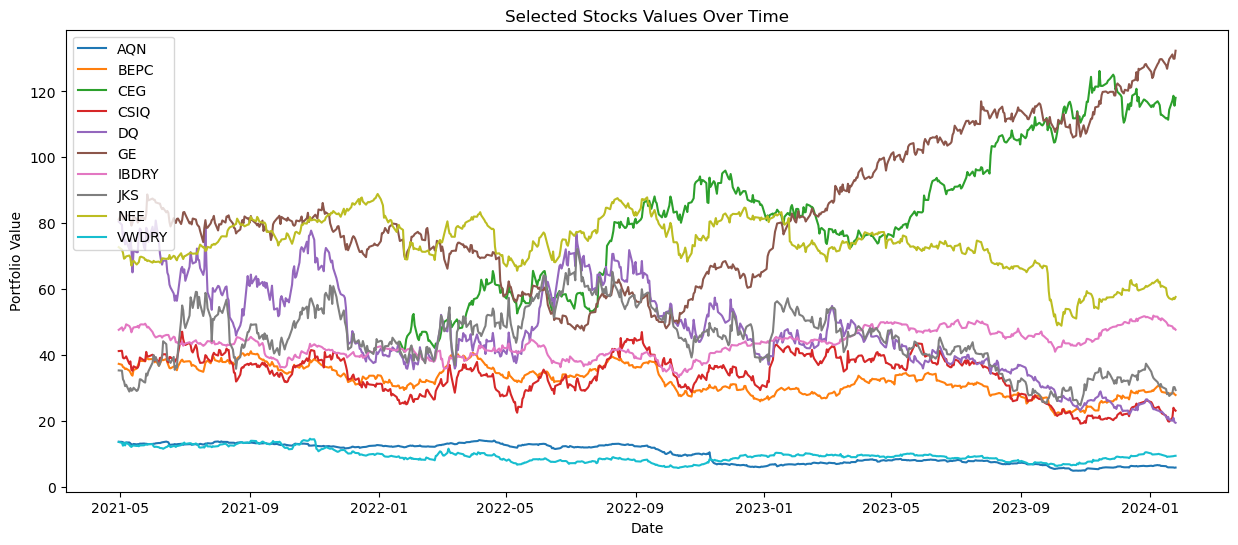

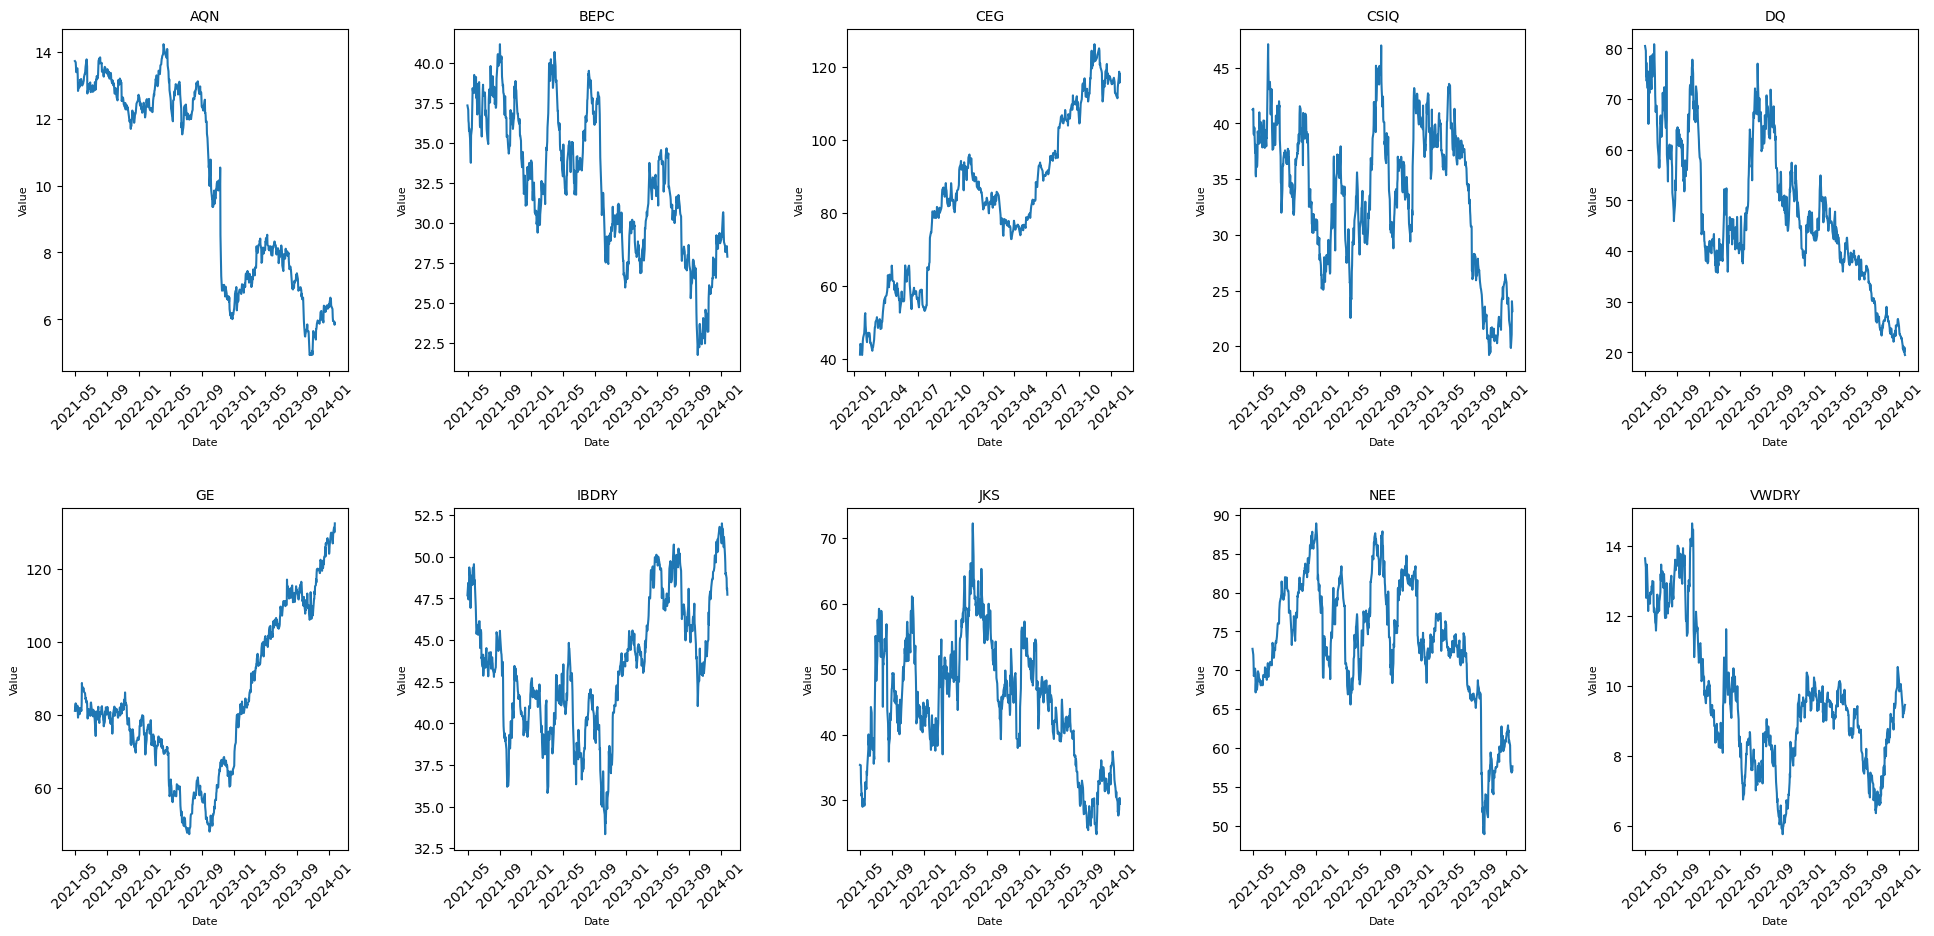

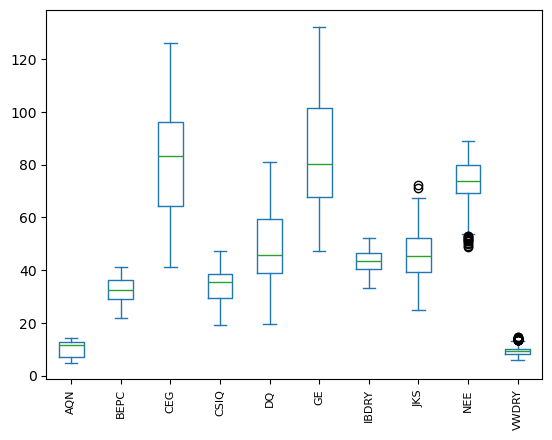

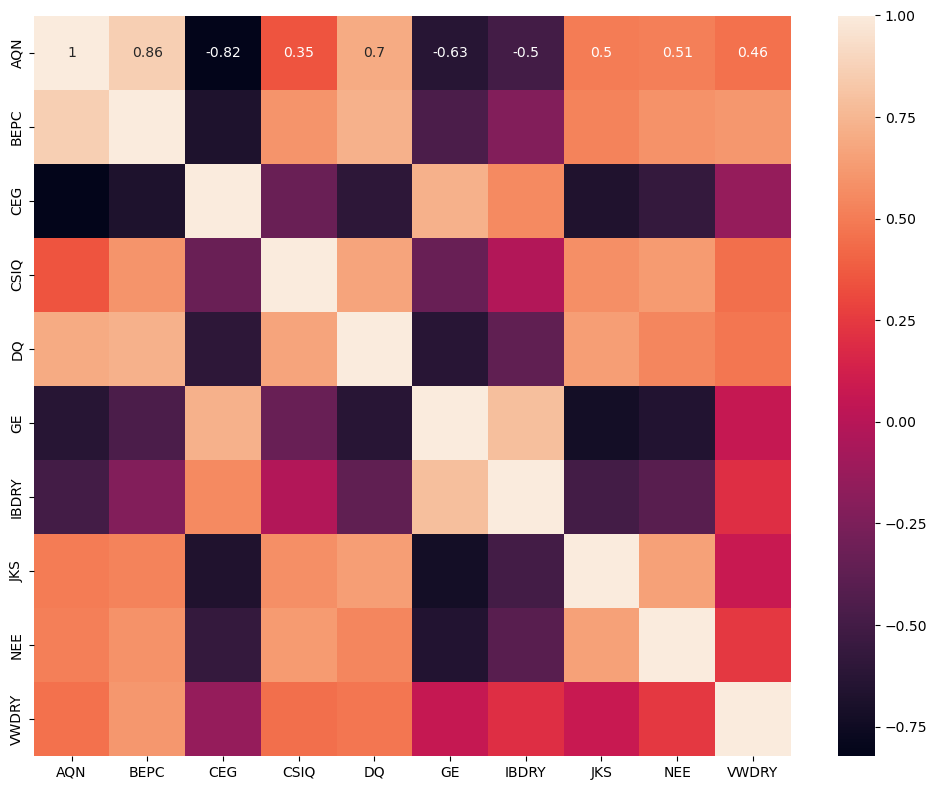

In [105]:
analyze_dataset(sustainable, summary_stat= True, data_quality = True, exploratory_analysis= True)

### Sustainable dataset = defining first dataset

In [77]:
# Stocks/Tickers we want to analyze
first_dataset= ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]
# Get Adjusted Close prices
df_sustain = get_stock_data(tickers = first_porfolio, num_days_back = 1000, info_type = "Adj Close")
df=df_sustain

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Unsustainable portfolio = defining second protfolio

In [61]:
# Unsustainable companies tickers
second_portfolio = ["EQNR", "BP", "0857.HK", "COP", "FP.VI", "SHEL", "CVX", "SR", "ENEL.MI"]

# Get the data -> ENEL and PETROCHINA not Found
df_unsustain = get_stock_data(tickers = second_porfolio, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Explanatory data analysis

#### Exploring sustainable porfolio 

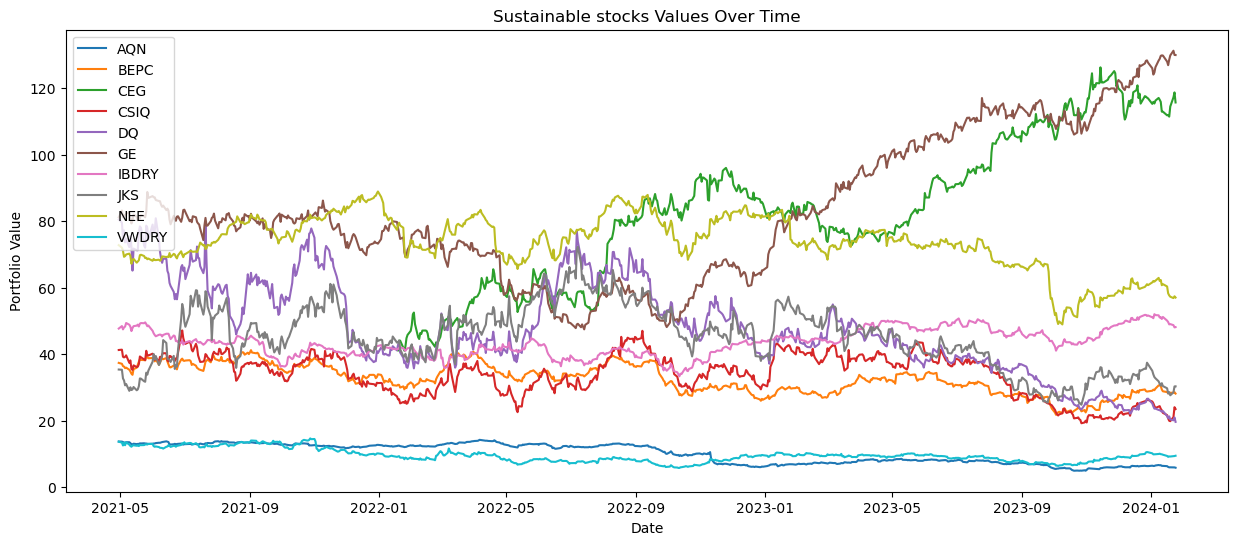

In [28]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_sustain.columns:
    plt.plot(df_sustain.index, df_sustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Sustainable stocks Values Over Time')
plt.legend()
plt.show()

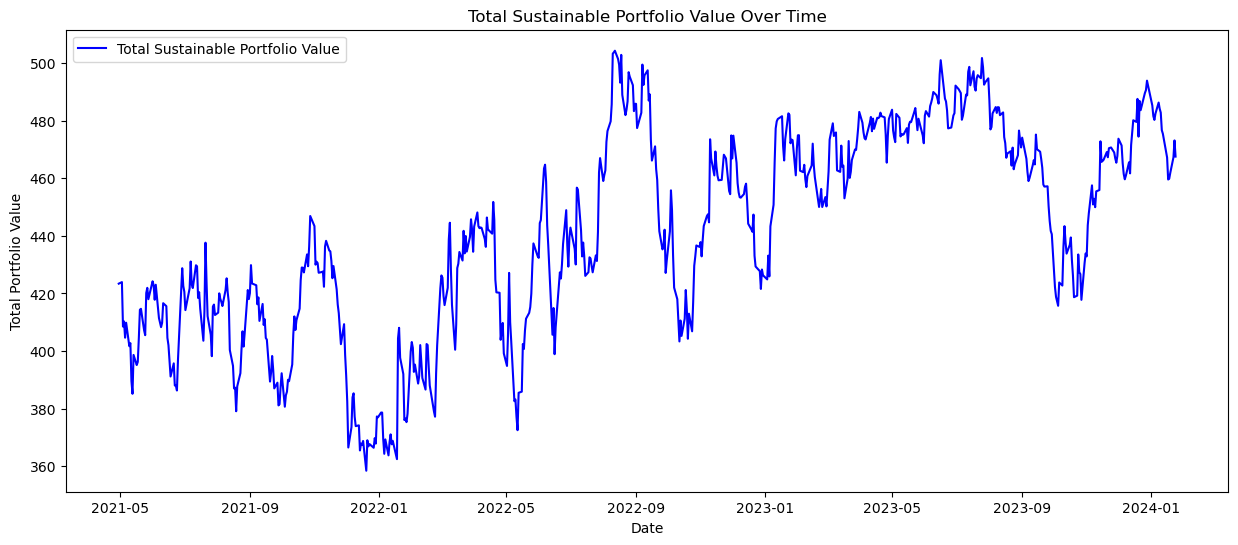

In [29]:
#graph of sustainable stocks colectively
# Summing the data across columns
total_portfolio = df_sustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_portfolio.index, total_portfolio, label='Total Sustainable Portfolio Value', color="blue")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Total Sustainable Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

### Graph for each share

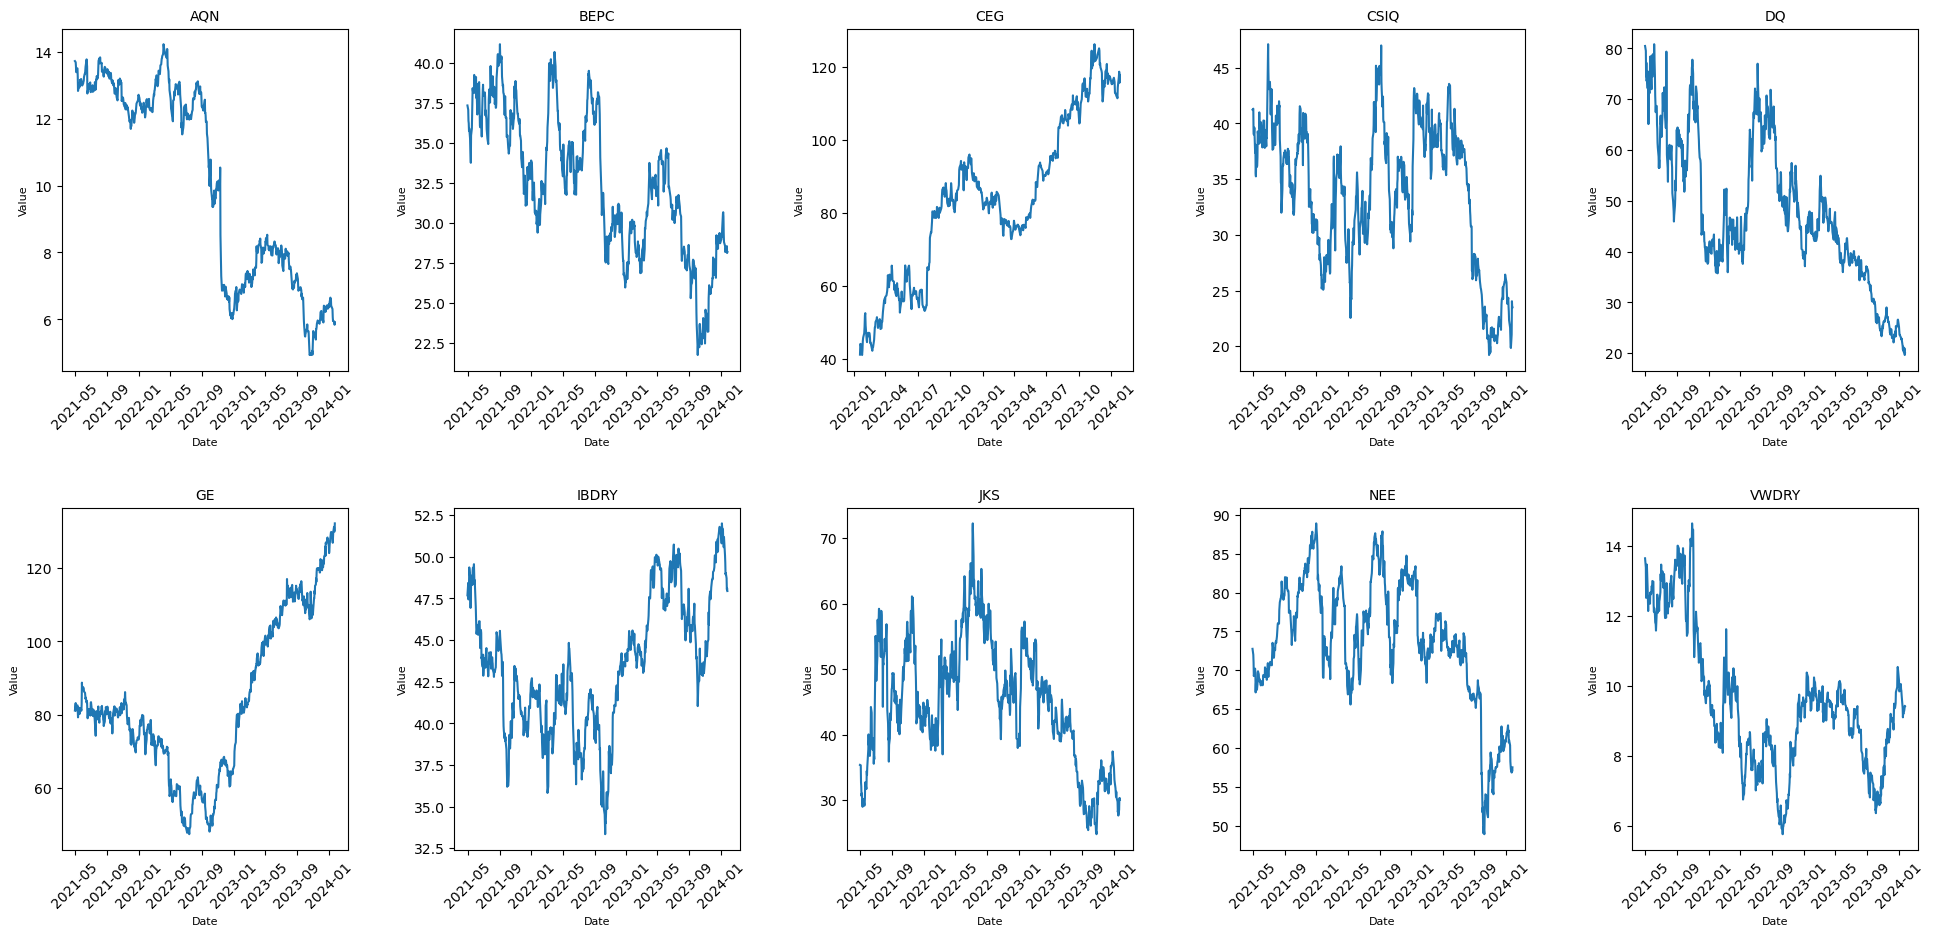

In [95]:
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_sustain.columns):
    axes[i].plot(df_sustain.index, df_sustain[column])
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('Date', fontsize=8)
    axes[i].set_ylabel('Value', fontsize=8)
    axes[i].tick_params(axis='x', labelrotation=45)

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

#### Exploring unsustainable porfolio 

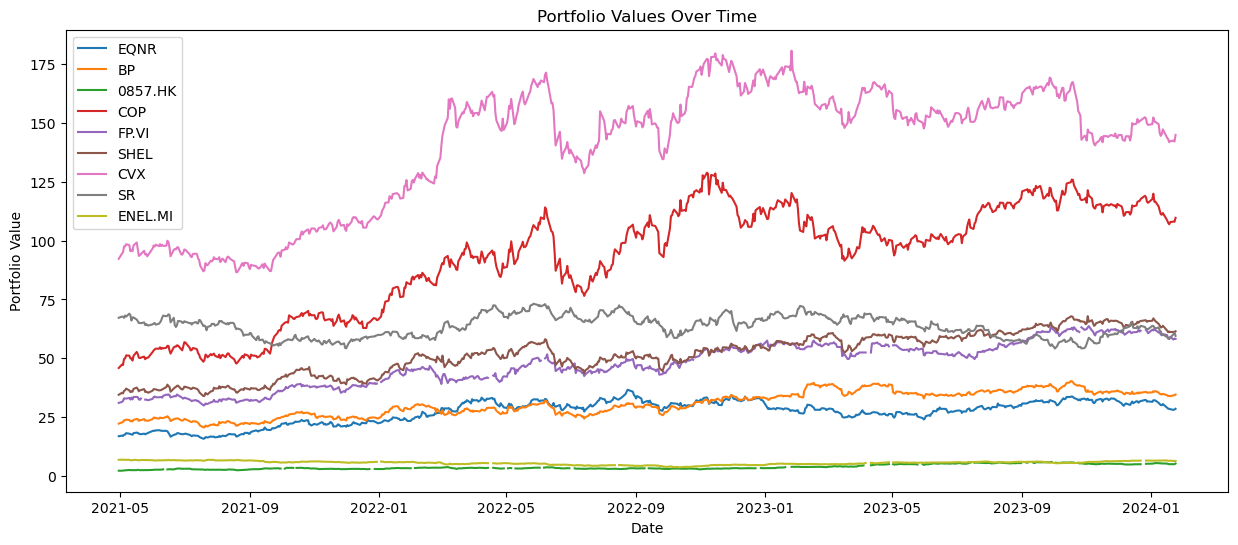

In [31]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_unsustain.columns:
    plt.plot(df_unsustain.index, df_unsustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values Over Time')
plt.legend()
plt.show()

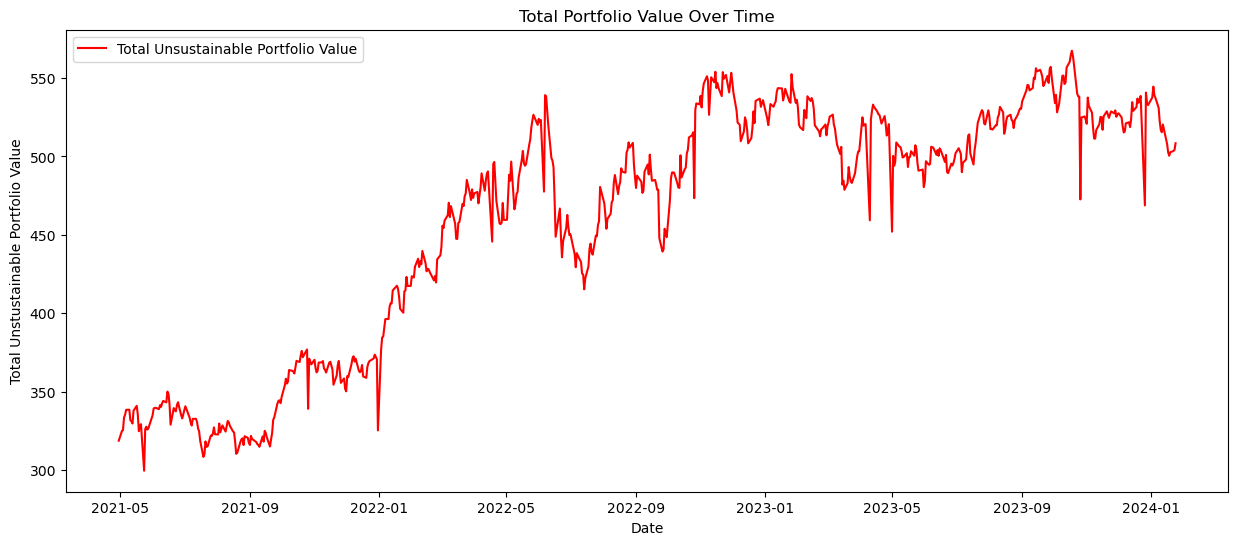

In [32]:
# Stotal portfolio
total_un_portfolio = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_un_portfolio.index, total_un_portfolio, label='Total Unsustainable Portfolio Value', color="red")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Unstustainable Portfolio Value')
plt.title('Total Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

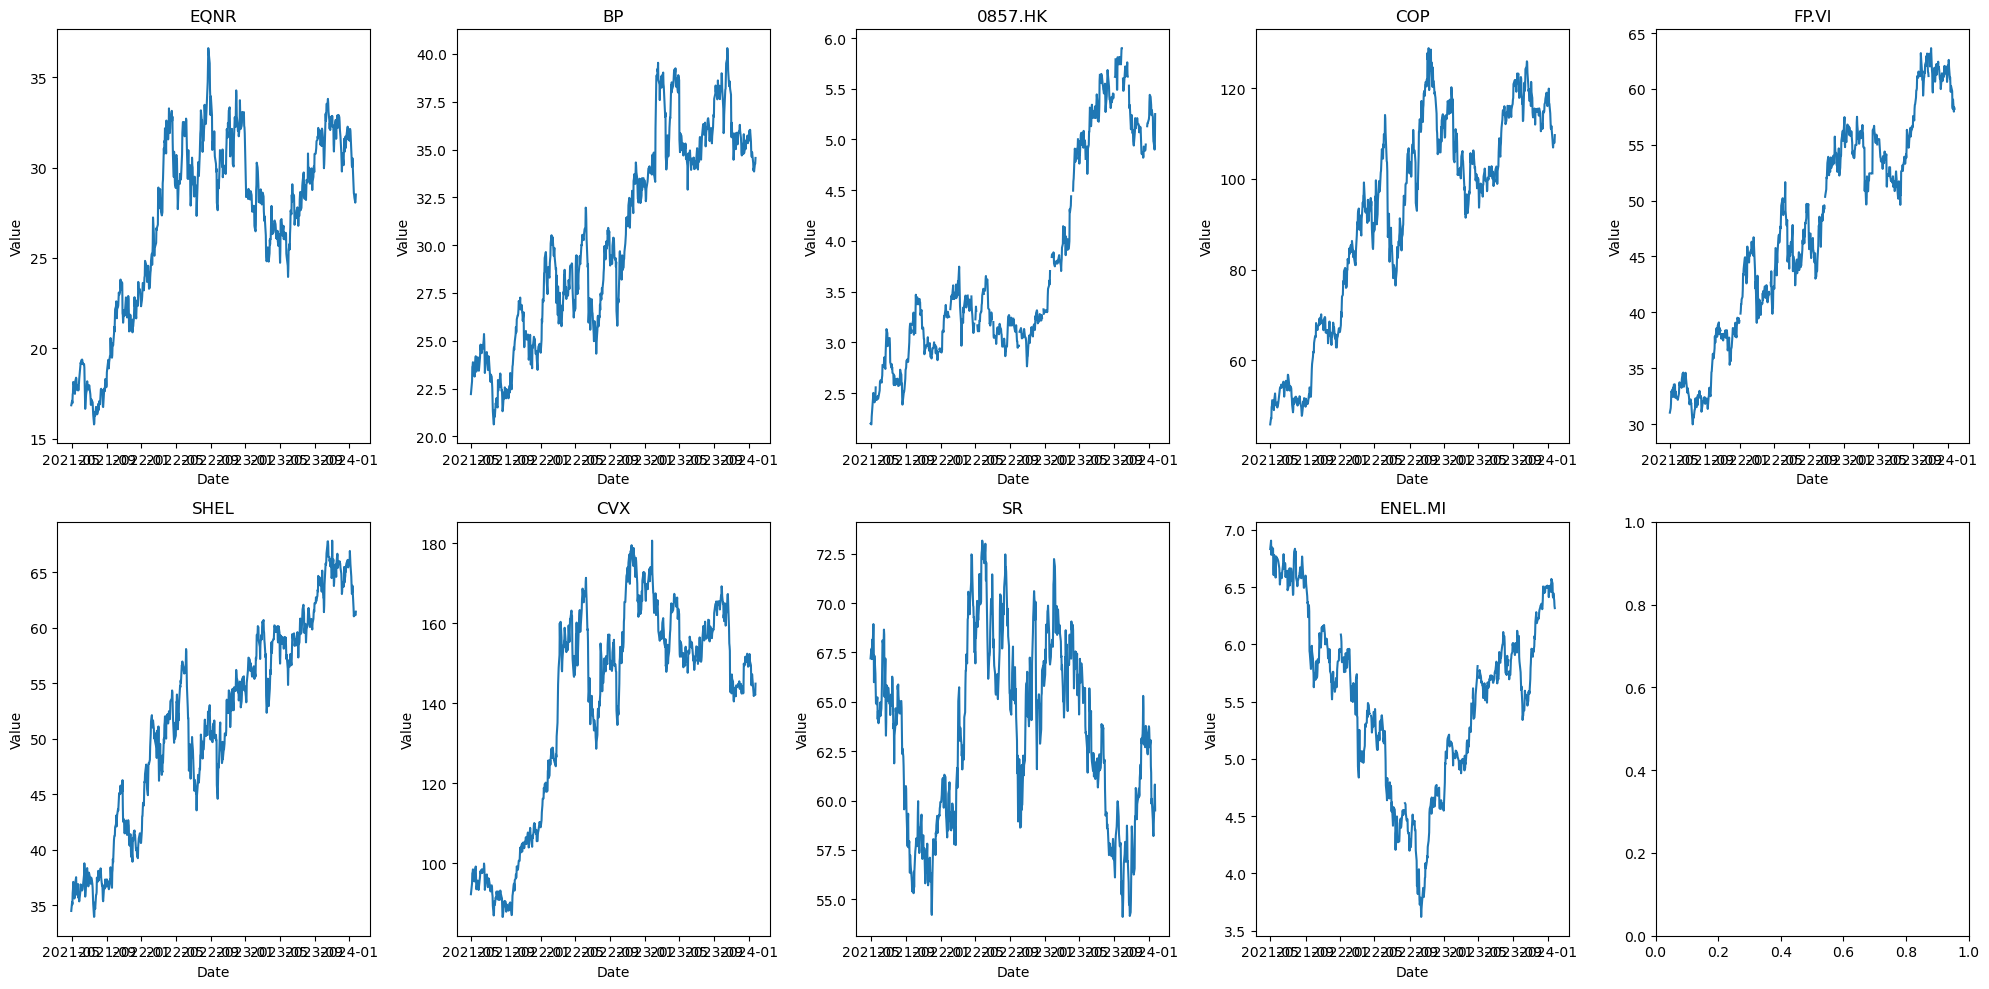

In [33]:
#to fix - the last stock
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_unsustain.columns):
    axes[i].plot(df_unsustain.index, df_unsustain[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Combination of both portfolios

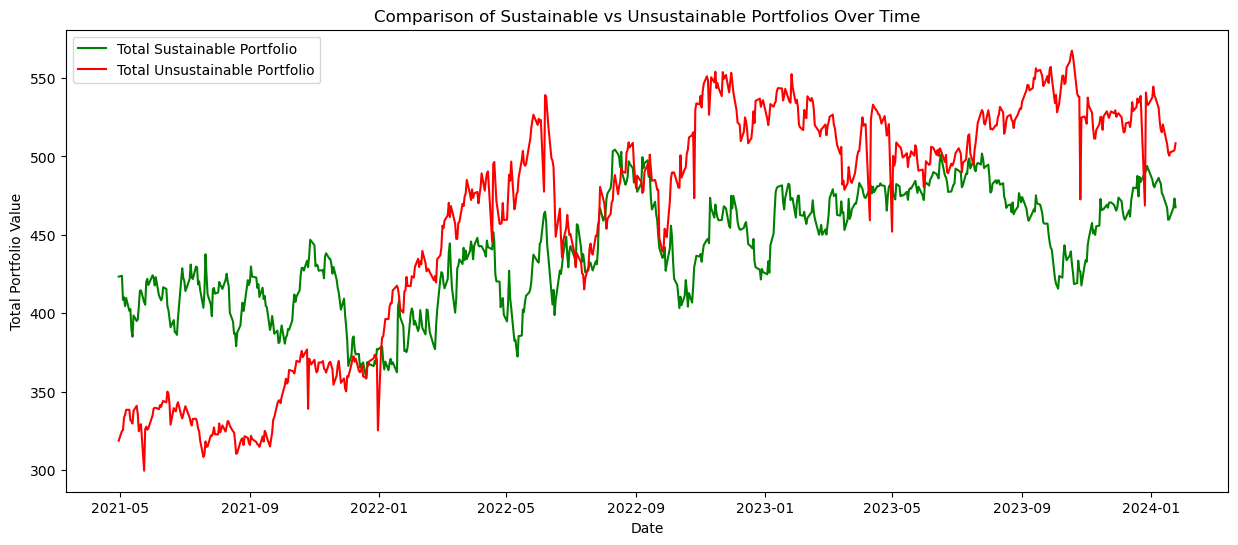

In [34]:
# Summing the data across columns for both DataFrames
total_sustain = df_sustain.sum(axis=1)
total_unsustain = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data for both DataFrames
plt.plot(total_sustain.index, total_sustain, label='Total Sustainable Portfolio', color='green')
plt.plot(total_unsustain.index, total_unsustain, label='Total Unsustainable Portfolio', color='red')

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Comparison of Sustainable vs Unsustainable Portfolios Over Time')
plt.legend()

# Displaying the plot
plt.show()

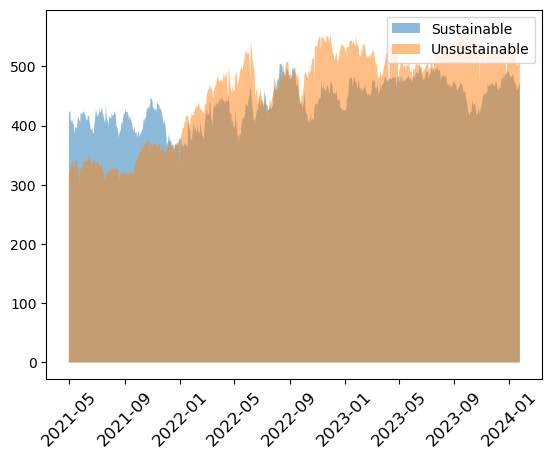

In [42]:
#An area plot can be used to display the cumulative values over time, showing how each portfolio's total value grows.
#This can be particularly effective in highlighting the growth difference between the two portfolios.

plt.fill_between(total_sustain.index, total_sustain, label='Sustainable', alpha=0.5)
plt.fill_between(total_unsustain.index, total_unsustain, label='Unsustainable', alpha=0.5)

# Improving the X-axis labels
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tick_params(axis='x', labelsize=12)  # Decrease font size of labels 
# Displaying the plot
plt.legend()
plt.show()


In [44]:
# Bar Chart for Comparing Specific Intervals
monthly_sustain = df_sustain.resample('M').mean()
monthly_unsustain = df_unsustain.resample('M').mean()


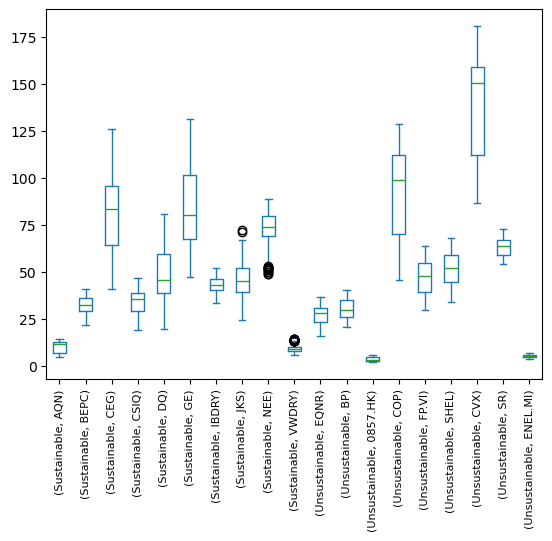

In [50]:
#Box Plot for Distribution Analysis
combined_data = pd.concat([df_sustain, df_unsustain], axis=1, keys=['Sustainable', 'Unsustainable'])

# Creating the box plot
ax = combined_data.plot(kind='box')

# Adjusting the X-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate labels by 45 degrees
ax.tick_params(axis='x', labelsize=8)  # Decrease font size of labels to 8

# Displaying the plot
plt.show()

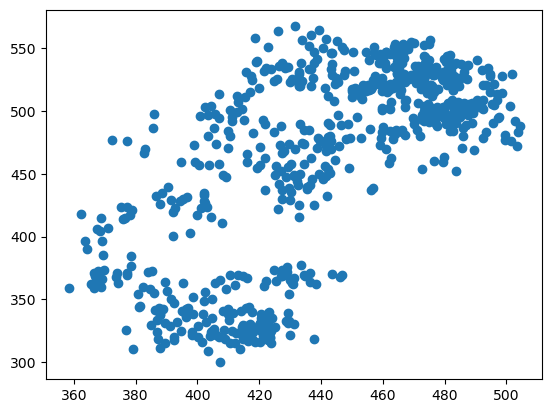

In [38]:
#?? what is the point of this chart?? -->> Delete?
#Scatter Plot for Correlation Analysis
plt.scatter(df_sustain.sum(axis=1), df_unsustain.sum(axis=1))

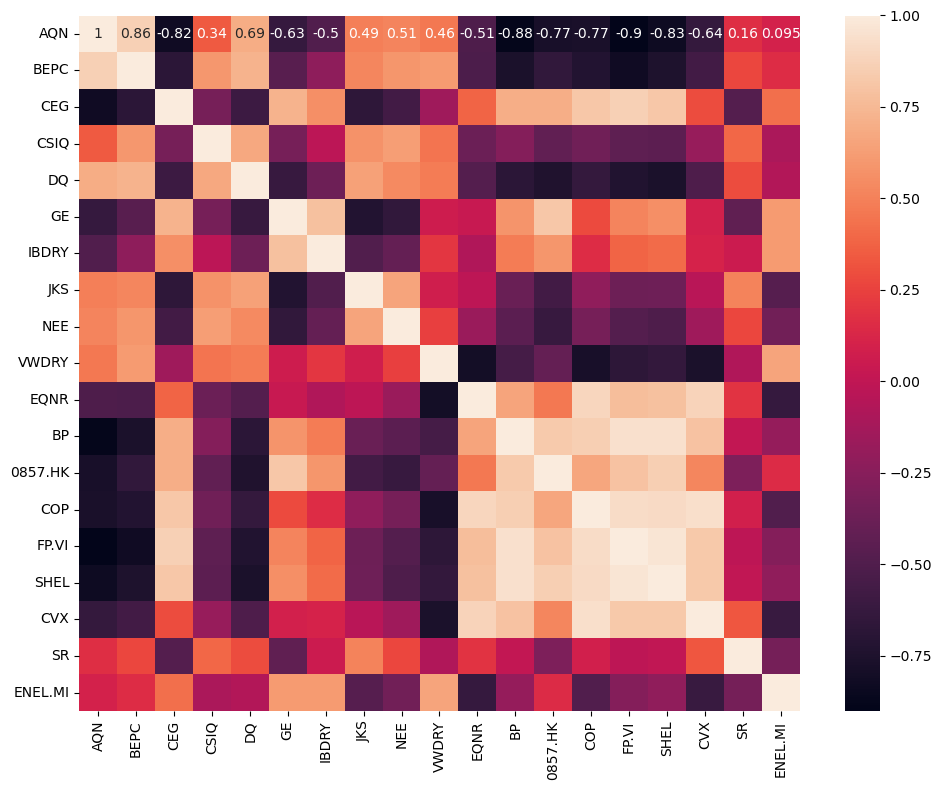

In [52]:
#Heatmap for Correlation Between Stocks
correlation_matrix = pd.concat([df_sustain, df_unsustain], axis=1).corr()

# Increase the figure size
plt.figure(figsize=(10, 8)) # You may adjust these values as needed

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True)

# Adjust layout to make room for the annotations
plt.tight_layout() 

# Show the plot
plt.show()


<Axes: xlabel='Date'>

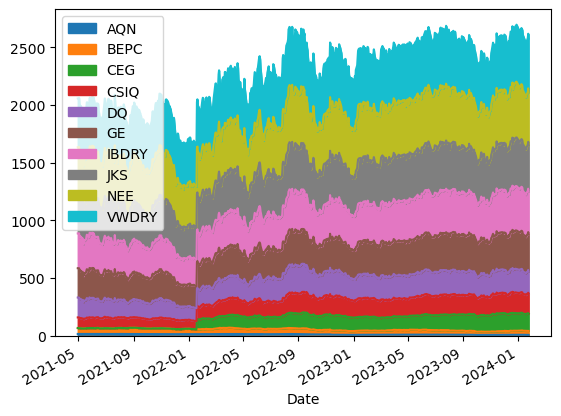

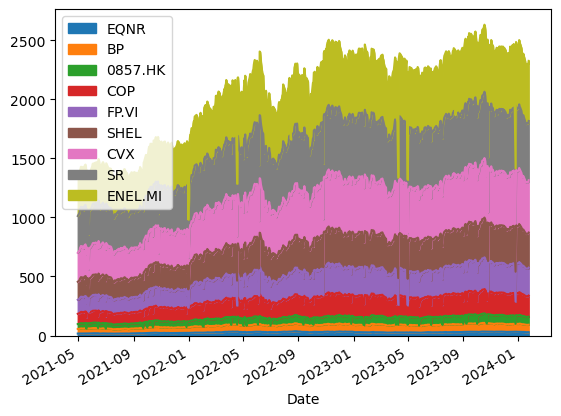

In [53]:
# Stacked Line or Area Chart for Portfolio Composition
df_sustain.cumsum(axis=1).plot(kind='area')
df_unsustain.cumsum(axis=1).plot(kind='area')


#### Analysis at this point in time 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

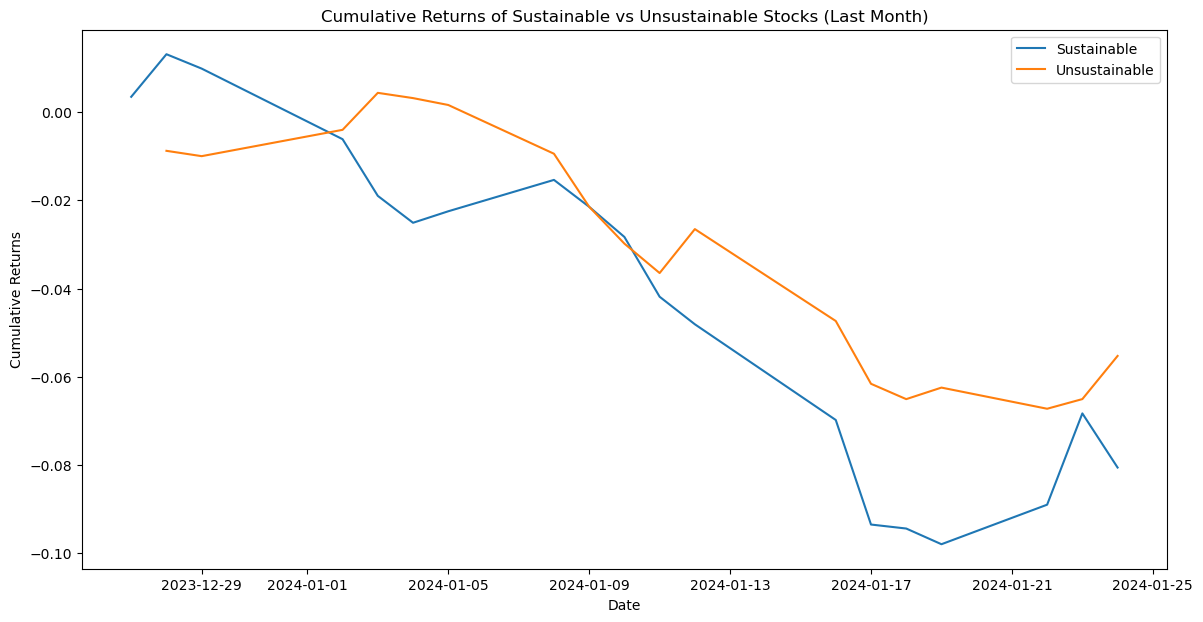

In [58]:
# Updated function to get the last month of stock data
def get_stock_data_last_month(tickers, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=30)  # Set to 30 days for the last month
    
    df = pd.DataFrame()
    
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        df[ticker] = data[info_type]
    
    return df

# Define the information type you are interested in
info_type = 'Close'  # Assume we are interested in the closing prices

# Fetch the stock data for the last month for sustainable and unsustainable companies
sustainable_data_last_month = get_stock_data_last_month(stocks_sustainable, info_type)
unsustainable_data_last_month = get_stock_data_last_month(stocks_unsustainable, info_type)

# Here you can perform your analysis on the data
# For example, you could calculate and compare the average closing price for both groups
sustainable_avg_close = sustainable_data_last_month.mean(axis=0)
unsustainable_avg_close = unsustainable_data_last_month.mean(axis=0)

# Or calculate daily returns and then the cumulative returns for the last month
sustainable_daily_returns = sustainable_data_last_month.pct_change().dropna()
unsustainable_daily_returns = unsustainable_data_last_month.pct_change().dropna()
sustainable_cumulative_returns = (1 + sustainable_daily_returns).cumprod() - 1
unsustainable_cumulative_returns = (1 + unsustainable_daily_returns).cumprod() - 1

# Visualization - Compare the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(sustainable_cumulative_returns.mean(axis=1), label='Sustainable')
plt.plot(unsustainable_cumulative_returns.mean(axis=1), label='Unsustainable')
plt.title('Cumulative Returns of Sustainable vs Unsustainable Stocks (Last Month)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

